# Data Preprocessing

## Load Image

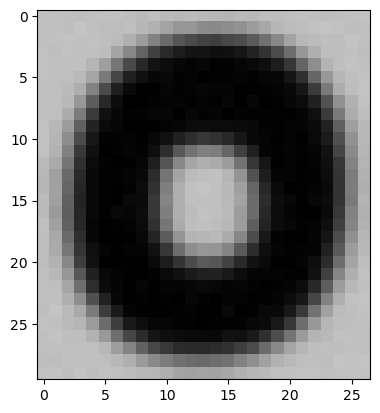

In [245]:
#Load library opencv
import cv2
#Load Image
img = cv2.imread('/kaggle/input/standard-ocr-dataset/data/training_data/0/0.png')
plt.imshow(img)


In [247]:
cv2.imwrite('old_0.png', img)

True

## Step 1: Normalization

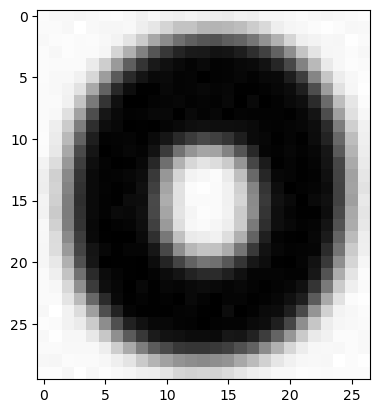

In [236]:
norm = np.zeros((img.shape[0], img.shape[1]))
img = cv2.normalize(img, norm, 0, 255, cv2.NORM_MINMAX)
plt.imshow(img)

## Step 2: De-Skewing

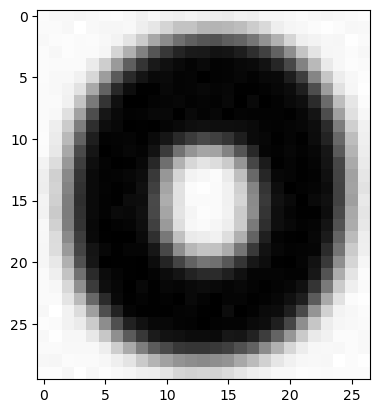

In [237]:
def getSkewAngle(cvImage) -> float:
    # Prep image, copy, convert to gray scale, blur, and threshold
    newImage = cvImage.copy()
    gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9, 9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Apply dilate to merge text into meaningful lines/paragraphs.
    # Use larger kernel on X axis to merge characters into single line, cancelling out any spaces.
    # But use smaller kernel on Y axis to separate between different blocks of text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel, iterations=5)

    # Find all contours
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)

    # Find largest contour and surround in min area box
    largestContour = contours[0]
    minAreaRect = cv2.minAreaRect(largestContour)

    # Determine the angle. Convert it to the value that was originally used to obtain skewed image
    
    angle = minAreaRect[-1]
    if abs(angle) < 45 :
        return -1.0 * angle
    return 0

def deskew(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

angle = getSkewAngle(norm_img)
img = deskew(img, angle)
plt.imshow(img)


## Step 3: Image Scaling

In [238]:
#Resize function is used for image scaling. 
def resize(img):
    length_x, width_y = img.shape[:2]
    factor = min(1, float(1024.0 / length_x))
    new_shape = int(factor * width_y), int(factor * length_x)
    resized_img = cv2.resize(img, new_shape, interpolation= cv2.INTER_LINEAR) #Interpolation is used to smooth the image.
    return resized_img
    

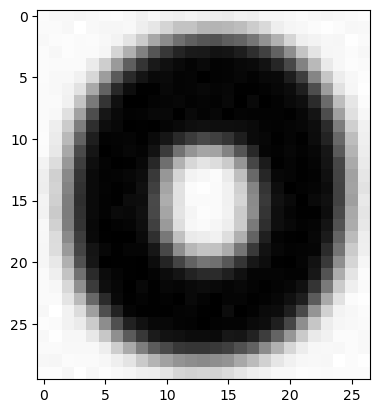

In [239]:
img = resize(img)
plt.imshow(img)

## Step 4: Noise Removal

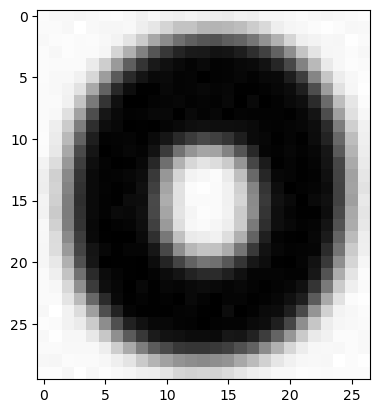

In [240]:
#Remove noise from the image
def remove_noise(image):
    return cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 15)

img = resize(img)
plt.imshow(img)

## Step 5: Thinning and Skeletonization

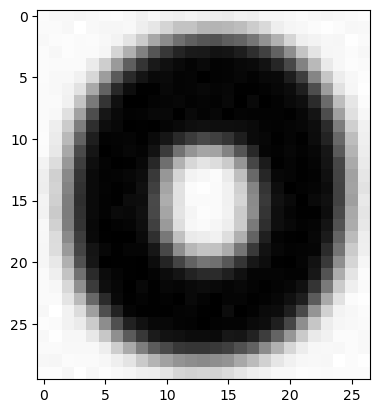

In [241]:
#Function for image thinning
def thinning(img):
    kernel = np.ones((5,5),np.uint8)
    erosion = cv2.erode(img, kernel, iterations = 1)
    return erosion

img = resize(img)
plt.imshow(img)

# Step 6: Thresholding

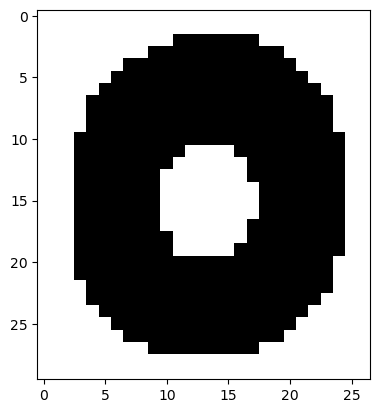

In [242]:
#Function for image thresholding
def thresholding(image):
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY +cv2.THRESH_OTSU) [1]

img = thresholding(img)
plt.imshow(img, cmap='gray')

In [244]:
cv2.imwrite('new_0.png', img)

True